In [2]:
import pandas as pd

# keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

# **1. Xử lý dữ liệu**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/electric-vehicle-battery-life-prediction/dataset/cleaned_dataset/metadata.csv")
df

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7560,impedance,[2010. 9. 30. 7. 36. ...,24,B0055,247,7561,07561.csv,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,[2010. 9. 30. 8. 8. ...,4,B0055,248,7562,07562.csv,1.0201379996149256,NaN,NaN
7562,charge,[2010. 9. 30. 8. 48. 54.25],4,B0055,249,7563,07563.csv,NaN,NaN,NaN
7563,discharge,[2010. 9. 30. 11. 50. ...,4,B0055,250,7564,07564.csv,0.9907591663373165,NaN,NaN


In [4]:
df.shape

(7565, 10)

In [5]:
#xóa các cột ko cần thiết
df = df.drop(columns=['start_time','battery_id','test_id','uid','filename'])
df

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.6743047446975208,NaN,NaN
1,impedance,24,NaN,0.05605783343888099,0.20097016584458333
2,charge,4,NaN,NaN,NaN
3,impedance,24,NaN,0.05319185850921101,0.16473399914864734
4,discharge,4,1.5243662105099023,NaN,NaN
...,...,...,...,...,...
7560,impedance,24,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,4,1.0201379996149256,NaN,NaN
7562,charge,4,NaN,NaN,NaN
7563,discharge,4,0.9907591663373165,NaN,NaN


In [6]:
df.isnull().sum()

,0
type,0
ambient_temperature,0
Capacity,4771
Re,5609
Rct,5609


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   ambient_temperature  7565 non-null   int64 
 2   Capacity             2794 non-null   object
 3   Re                   1956 non-null   object
 4   Rct                  1956 non-null   object
dtypes: int64(1), object(4)
memory usage: 295.6+ KB


In [8]:
# chuyển object thành numertic, giá trị invalid thành NaN
df['Re'] = pd.to_numeric(df['Re'], errors='coerce')
df['Rct'] = pd.to_numeric(df['Rct'], errors='coerce')
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 7565 non-null   object 
 1   ambient_temperature  7565 non-null   int64  
 2   Capacity             2769 non-null   float64
 3   Re                   1947 non-null   float64
 4   Rct                  1947 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 295.6+ KB


In [9]:
# thay thế tại chỗ NaN bằng giá trị trung bình mỗi cột
df['Re'].fillna(df['Re'].mean(), inplace=True)
df['Rct'].fillna(df['Rct'].mean(), inplace=True)
df['Capacity'].fillna(df['Capacity'].mean(), inplace=True)
df

<ipython-input-9-60fda9a4b34b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Re'].fillna(df['Re'].mean(), inplace=True)
<ipython-input-9-60fda9a4b34b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.674305,-4.976500e+11,1.055903e+12
1,impedance,24,1.326543,5.605783e-02,2.009702e-01
2,charge,4,1.326543,-4.976500e+11,1.055903e+12
3,impedance,24,1.326543,5.319186e-02,1.647340e-01
4,discharge,4,1.524366,-4.976500e+11,1.055903e+12
...,...,...,...,...,...
7560,impedance,24,1.326543,9.680880e-02,1.548974e-01
7561,discharge,4,1.020138,-4.976500e+11,1.055903e+12
7562,charge,4,1.326543,-4.976500e+11,1.055903e+12
7563,discharge,4,0.990759,-4.976500e+11,1.055903e+12


In [10]:
df.isnull().sum()

,0
type,0
ambient_temperature,0
Capacity,0
Re,0
Rct,0


In [11]:
df["type"].value_counts()

,count
type,
charge,2815
discharge,2794
impedance,1956


# **#mã hóa dữ liệu thành nhị phân**

In [12]:
# df = pd.get_dummies(df, columns=['type'], dtype=int)
# df

onehot_encoder = OneHotEncoder(sparse_output=False) #sparse=False trả về mảng numpy

# fit, transform và nối vào dataframe ban đầu
df[['type_charge', 'type_discharge', 'type_impedance']] = onehot_encoder.fit_transform(df[['type']])

# xóa cột "type"
df.drop(columns=['type'], inplace=True)
df

,ambient_temperature,Capacity,Re,Rct,type_charge,type_discharge,type_impedance
0,4,1.674305,-4.976500e+11,1.055903e+12,0.0,1.0,0.0
1,24,1.326543,5.605783e-02,2.009702e-01,0.0,0.0,1.0
2,4,1.326543,-4.976500e+11,1.055903e+12,1.0,0.0,0.0
3,24,1.326543,5.319186e-02,1.647340e-01,0.0,0.0,1.0
4,4,1.524366,-4.976500e+11,1.055903e+12,0.0,1.0,0.0
...,...,...,...,...,...,...,...
7560,24,1.326543,9.680880e-02,1.548974e-01,0.0,0.0,1.0
7561,4,1.020138,-4.976500e+11,1.055903e+12,0.0,1.0,0.0
7562,4,1.326543,-4.976500e+11,1.055903e+12,1.0,0.0,0.0
7563,4,0.990759,-4.976500e+11,1.055903e+12,0.0,1.0,0.0


In [13]:
#cập nhật F, y
F = df.drop(columns=['ambient_temperature'])
y = df['ambient_temperature']

#chia tập dữ liệu
F_train, F_test, y_train, y_test = train_test_split(F, y, test_size=0.2, random_state=42)

print(f'F_train shape: {F_train.shape}')
print(f'F_test shape: {F_test.shape}')

F_train shape: (6052, 6)
F_test shape: (1513, 6)


# **#chuẩn hóa đầu vào**

In [14]:
scaler = MinMaxScaler()

# Fit và transform
F_train_scaled = scaler.fit_transform(F_train) # tính min, max trong từng cột và chuẩn hóa về [0, 1]

# transform
F_test_scaled = scaler.transform(F_test) #transform() trả lại mảng 2 chiều

print(f'Scaled X_train: \n{F_train_scaled[:5]}')

Scaled X_train: 
[[5.02450122e-01 9.99999999e-01 1.98111482e-10 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.55998175e-01 0.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [3.60527766e-02 0.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [5.02450122e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.35874070e-01 0.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


In [15]:
F_train_scaled.shape

(6052, 6)

# **2. Xây dựng mô hình**

In [16]:
model = Sequential()

# input-layer, hidden-layer (fully-connected), hàm kich hoạt
model.add(Dense(units=64, activation='relu', input_dim=F_train_scaled.shape[1]))

# dropout-layer: tắt 20% ngẫu nhiên số nơ-ron trong mỗi mỗi batch để tránh overfitting
model.add(Dropout(0.2))

model.add(Dense(units=32, activation='relu'))

model.add(Dropout(0.2))

# output-layer với 1 notron đầu ra, linear: giữ nguyên giá trị đầu ra cho hồi quy
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Nếu có 10,000 mẫu dữ liệu và batch size = 32, thì mô hình sẽ cần 10,000 / 32 = 312.5 batch để hoàn thành 1 epoch
history = model.fit(F_train_scaled, y_train, epochs=200, batch_size=16, validation_data=(F_test_scaled, y_test))

Epoch 1/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 312.4091 - val_loss: 23527.5684
Epoch 2/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 113.5915 - val_loss: 14164.1768
Epoch 3/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 111.3069 - val_loss: 14059.0215
Epoch 4/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 108.0117 - val_loss: 7309.1099
Epoch 5/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 106.4825 - val_loss: 4198.8052
Epoch 6/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 105.5699 - val_loss: 1672.8632
Epoch 7/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 101.8503 - val_loss: 992.8840
Epoch 8/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 99.2434 - val_loss: 621.6501
Epoch 9/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 94.3084 - val_loss: 353.6254
Epoch 10/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 98.7124 - val_loss: 510.9407
Epoch 11/200
379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 93.9218 - val_loss: 7

# **3. Đánh giá mô hình**

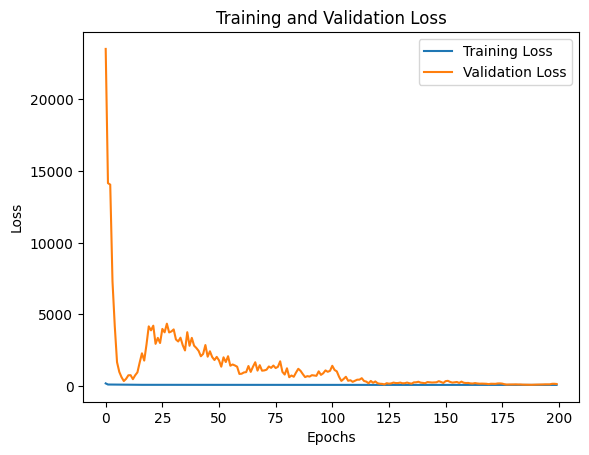

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 310.4451
Mean Squared Error on test set: 150.302734375


In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# đánh giá mô hình trên tập test
mse = model.evaluate(F_test_scaled, y_test)
print(f'Mean Squared Error on test set: {mse}')

# **4. Dự đoán**

In [19]:
import numpy as np

#vector kích thước = số cột
input_vector = np.zeros(len(F.columns))
input_vector

array([0., 0., 0., 0., 0., 0.])

In [20]:
F.columns.get_loc('type_charge')

3

In [21]:
# chuẩn bị đầu vào
def prepare_input(type, Capacity, Re, Rct):
    #vector kích thước = số cột
    input_vector = np.zeros(len(F.columns))

    # encode và gán giá trị cho vector
    if type == 'charge':
        input_vector[F.columns.get_loc('type_charge')] = 1.0
    elif type == 'discharge':
        input_vector[F.columns.get_loc('type_discharge')] = 1.0
    elif type == 'impedance':
        input_vector[F.columns.get_loc('type_impedance')] = 1.0

    input_vector[F.columns.get_loc('Capacity')] = Capacity
    input_vector[F.columns.get_loc('Re')] = Re
    input_vector[F.columns.get_loc('Rct')] = Rct

    F_input = np.array([input_vector])

    # chuẩn hóa đặc trưng đầu vào
    F_input_scaled = scaler.transform(F_input)

    return F_input_scaled

In [22]:
# dự đoán
def predict_battery_life(**predict_input):
    F_input_scaled = prepare_input(**predict_input)

    # đầu ra dự đoán (ambient_temperature)
    y_predicted = model.predict(F_input_scaled)

    return y_predicted[0]

In [23]:
# test dữ liệu mẫu
y_predicted = predict_battery_life(type = 'discharge', Capacity = 1.674305, Re = -4.976500e+11, Rct = 1.055903e+12)

print(f"Predicted Battery Life: {y_predicted}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Battery Life: [26.767569]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# **5. Lưu file**

In [24]:
import pickle

pickle_dir_path="/content/drive/MyDrive/Colab Notebooks/electric-vehicle-battery-life-prediction/pickle"

with open(f'{pickle_dir_path}/battery_life_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open(f'{pickle_dir_path}/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open(f'{pickle_dir_path}/onehot_encoder.pkl', 'wb') as encode_file:
    pickle.dump(onehot_encoder, encode_file)

model.save(f"{pickle_dir_path}/battery_life_model.h5")